In [98]:
# Imports
import numpy as np
from collections import Counter
from matplotlib import pyplot as plt

In [391]:
# Load file
data = np.genfromtxt("./parkour2/1.txt", delimiter=",")

In [392]:
len(data)

7

## CoM

In [336]:
# CoM error between prediction and real
real_com = data[:, :2]
predicted_com = data[:, 2:4]

In [337]:
com_diff = np.abs(real_com - predicted_com)

In [338]:
print("Highest error between real and predicted com: ", np.max(com_diff[:, 0]), np.max(com_diff[:, 1]))
print("Lowest error between real and predicted com: ", np.min(com_diff[:, 0]), np.min(com_diff[:, 1]))
print("Average error between real and predicted com: ", np.mean(com_diff[:, 0]), np.mean(com_diff[:, 1]))

Highest error between real and predicted com:  0.1099329 0.03476549
Lowest error between real and predicted com:  2.2999999999995246e-05 0.00020878999999999863
Average error between real and predicted com:  0.053821389677419354 0.006037618580645161


## Footsteps

In [311]:
# Adjust footsetp symmetry
for x in range(len(data)):
    if (data[x, 4] > data[x, 6]) != (data[x, 12] > data[x, 14]):
        data[x, 4], data[x, 6] = data[x, 6], data[x, 4]
        data[x, 8], data[x, 10] = data[x, 10], data[x, 8]

In [393]:
footsteps_diff = np.abs(data[:, 4:12] - data[:, 12:20])

In [394]:
real_footsteps = data[:, 4:12]
predicted_footsteps = data[:, 12:20]

In [395]:
fl_rr_swinging = []
fr_rl_swinging = []

for x in range(1, len(data)):
    if (real_footsteps[x, 0]-real_com[x, 0]) > (real_footsteps[x-1, 0]-real_com[x-1, 0]):
        fl_rr_swinging.append(x)
    else:
        fr_rl_swinging.append(x)

fl_rr_swinging = np.asarray(fl_rr_swinging)
fr_rl_swinging = np.asarray(fr_rl_swinging)

In [396]:
print(fr_rl_swinging.shape)
print(fl_rr_swinging.shape)

(3,)
(3,)


In [397]:
print("Highest error for FL foot: ", np.max(footsteps_diff[fl_rr_swinging, 0]), np.max(footsteps_diff[fl_rr_swinging, 1]))
print("Lowest error for FL foot: ", np.min(footsteps_diff[fl_rr_swinging, 0]), np.min(footsteps_diff[fl_rr_swinging, 1]))
print("Average error for FL foot: ", np.mean(footsteps_diff[fl_rr_swinging, 0]), np.mean(footsteps_diff[fl_rr_swinging, 1]))

Highest error for FL foot:  0.21308300000000002 0.008714
Lowest error for FL foot:  0.0062429999999999986 0.004185999999999995
Average error for FL foot:  0.10893266666666668 0.0058569999999999916


In [398]:
print("Highest error for FR foot: ", np.max(footsteps_diff[fl_rr_swinging, 2]), np.max(footsteps_diff[fr_rl_swinging, 3]))
print("Lowest error for FR foot: ", np.min(footsteps_diff[fr_rl_swinging, 2]), np.min(footsteps_diff[fr_rl_swinging, 3]))
print("Average error for FR foot: ", np.mean(footsteps_diff[fr_rl_swinging, 2]), np.mean(footsteps_diff[fr_rl_swinging, 3]))

Highest error for FR foot:  0.007624999999999993 0.018951999999999997
Lowest error for FR foot:  0.04292699999999994 0.005544999999999994
Average error for FR foot:  0.11678733333333324 0.010765666666666665


In [399]:
print("Highest error for RL foot: ", np.max(footsteps_diff[fr_rl_swinging, 4]), np.max(footsteps_diff[fr_rl_swinging, 5]))
print("Lowest error for RL foot: ", np.min(footsteps_diff[fr_rl_swinging, 4]), np.min(footsteps_diff[fr_rl_swinging, 5]))
print("Average error for RL foot: ", np.mean(footsteps_diff[fr_rl_swinging, 4]), np.mean(footsteps_diff[fr_rl_swinging, 5]))

Highest error for RL foot:  0.213403 0.018342999999999998
Lowest error for RL foot:  0.04849300000000001 0.010265999999999997
Average error for RL foot:  0.11577156666666667 0.014841000000000002


In [400]:
print("Highest error for RR foot: ", np.max(footsteps_diff[fl_rr_swinging, 6]), np.max(footsteps_diff[fl_rr_swinging, 7]))
print("Lowest error for RR foot: ", np.min(footsteps_diff[fl_rr_swinging, 6]), np.min(footsteps_diff[fl_rr_swinging, 7]))
print("Average error for RR foot: ", np.mean(footsteps_diff[fl_rr_swinging, 6]), np.mean(footsteps_diff[fl_rr_swinging, 7]))

Highest error for RR foot:  0.2093749 0.005350999999999995
Lowest error for RR foot:  0.00930261 0.0019720000000000015
Average error for RR foot:  0.11246183666666665 0.0032056666666666622


In [401]:
np.mean([np.mean(footsteps_diff[fl_rr_swinging, 0]), np.mean(footsteps_diff[fr_rl_swinging, 2]), np.mean(footsteps_diff[fr_rl_swinging, 4]), np.mean(footsteps_diff[fl_rr_swinging, 6])])

0.1134883508333333

In [402]:
np.mean([np.mean(footsteps_diff[fl_rr_swinging, 1]), np.mean(footsteps_diff[fr_rl_swinging, 3]), np.mean(footsteps_diff[fr_rl_swinging, 5]), np.mean(footsteps_diff[fl_rr_swinging, 7])])

0.00866733333333333

## Edges

In [403]:
# X coordinates of the obstaces edge
stairs = 12
depth = 3/stairs
edges_up = [1 + depth * x for x in range(stairs)] 
edges_down = [(edges_up[-1] + 2 * depth + 1) + depth * x for x in range(stairs)]
edges = edges_up + edges_down

In [404]:
# X coordinates of the obstaces parkour1
edges = [1, 1.08, 2.04, 2.128, 3.088, 3.16, 4.12, 4.19, 5.15, 5.24]

In [405]:
np.diff(edges)

array([0.08 , 0.96 , 0.088, 0.96 , 0.072, 0.96 , 0.07 , 0.96 , 0.09 ])

In [406]:
# X coordinates for the obstacles parkour2
poses = [1.234, 1.556, 1.827, 2.103, 2.355, 2.615, 2.892, 3.113, 3.37, 3.56, 3.76, 4.027, 4.28, 4.89]
sizes = [0.1325, 0.1325, 0.0735, 0.1325, 0.0735, 0.1325, 0.0735, 0.1325, 0.0735, 0.0735, 0.0735, 0.1325, 0.0735, 0.48]

edges = [1.036]
for x in range(len(poses)):
    edges.append(poses[x] - sizes[x])
    edges.append(poses[x] + sizes[x])

In [407]:
np.diff(edges)[::2]

array([0.0655, 0.057 , 0.065 , 0.07  , 0.046 , 0.054 , 0.071 , 0.015 ,
       0.051 , 0.043 , 0.053 , 0.061 , 0.047 , 0.0565])

In [408]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]

In [409]:
# Compute minimum distance from any obstacle
def get_min_edge_distances(footsteps_dataset):
    min_edge_distances = []
    for footstep in footsteps_dataset:
        temp = []
        for idx in range(len(footstep)):
            if idx in [0, 2, 4, 6]:
                temp.append(find_nearest(edges, footstep[idx]))
        min_edge_distances.append(temp)
        
    return np.array(min_edge_distances)

In [410]:
real_edge_distances = np.abs(real_footsteps[:, ::2] - get_min_edge_distances(real_footsteps))
predicted_edge_distances = np.abs(predicted_footsteps[:, ::2] - get_min_edge_distances(predicted_footsteps))

In [411]:
min_distance = 0.015

In [412]:
print("Lowest distance for FL foot: ", np.min(real_edge_distances[fl_rr_swinging, 0]), np.min(predicted_edge_distances[fl_rr_swinging, 0]))
print(f"Number of contacts with less than {min_distance} distance: ", len(np.where(real_edge_distances[fl_rr_swinging, 0] < min_distance)[0]))

Lowest distance for FL foot:  0.025419999999999998 0.08205200000000001
Number of contacts with less than 0.015 distance:  0


In [413]:
print("Lowest distance for FR foot: ", np.min(real_edge_distances[fr_rl_swinging, 1]), np.min(predicted_edge_distances[fr_rl_swinging, 1]))
print(f"Number of contacts with less than {min_distance} distance: ", len(np.where(real_edge_distances[fr_rl_swinging, 1] < min_distance)[0]))

Lowest distance for FR foot:  0.10018100000000008 0.03527999999999998
Number of contacts with less than 0.015 distance:  0


In [414]:
print("Lowest distance for RL foot: ", np.min(real_edge_distances[fr_rl_swinging, 2]), np.min(predicted_edge_distances[fr_rl_swinging, 2]))
print(f"Number of contacts with less than {min_distance} distance: ", len(np.where(real_edge_distances[fr_rl_swinging, 2] < min_distance)[0]))

Lowest distance for RL foot:  0.296172 0.509575
Number of contacts with less than 0.015 distance:  0


In [415]:
print("Lowest distance for RR foot: ", np.min(real_edge_distances[fl_rr_swinging, 3]), np.min(predicted_edge_distances[fl_rr_swinging, 3]))
print(f"Number of contacts with less than {min_distance} distance: ", len(np.where(real_edge_distances[fl_rr_swinging, 3] < min_distance)[0]))

Lowest distance for RR foot:  0.43087600000000004 0.5495840000000001
Number of contacts with less than 0.015 distance:  0


In [416]:
print("Number of FL/RR: ", len(real_edge_distances[fl_rr_swinging, 0]))

Number of FL/RR:  3


In [417]:
print("Number of FR/RL: ", len(real_edge_distances[fr_rl_swinging, 0]))

Number of FR/RL:  3


## Velocities

In [129]:
velocity_counter = Counter(data[:, -1])

In [28]:
print("Velocities commanded: ", set(data[:, -1]))

Velocities commanded:  {0.5, 1.0, 0.1, 0.2, 0.4, 0.7, 0.3, 0.9, 0.8, 0.6}


In [29]:
print("Cound of velocities: ", velocity_counter)

Cound of velocities:  Counter({1.0: 35, 0.1: 26, 0.2: 7, 0.4: 3, 0.7: 3, 0.8: 3, 0.5: 2, 0.3: 2, 0.9: 1, 0.6: 1})


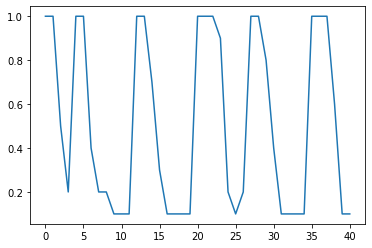

In [30]:
plt.plot([x for x in range(len(data)//2)], data[:len(data)//2, -1])

In [119]:
min_distance = 0.015

In [97]:
print("Lowest distance for FL foot: ", np.min(distances[:, 0]))
print(f"Number of contacts with less than {min_distance} distance: ", len(np.where(distances[:, 0] < min_distance)[0]))

NameError: name 'distances' is not defined

In [37]:
print("Lowest distance for FR foot: ", np.min(distances[:, 1]))
print(f"Number of contacts with less than {min_distance} distance: ", len(np.where(distances[:, 1] < min_distance)[0]))

Lowest distance for FR foot:  0.0
Number of contacts with less than 0.01 distance:  6


In [38]:
print("Lowest distance for RL foot: ", np.min(distances[:, 2]))
print(f"Number of contacts with less than {min_distance} distance: ", len(np.where(distances[:, 2] < min_distance)[0]))

Lowest distance for RL foot:  0.0
Number of contacts with less than 0.01 distance:  3


In [39]:
print("Lowest distance for RR foot: ", np.min(distances[:, 3]))
print(f"Number of contacts with less than {min_distance} distance: ", len(np.where(distances[:, 3] < min_distance)[0]))

Lowest distance for RR foot:  0.0191
Number of contacts with less than 0.01 distance:  0
